

```
FINAL PROJECT
Nama : Fadhilah Nadia Puteri
Course : Machine Learning
```

**IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np

#Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

#Library untuk evaluasi hasil pemodelan
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#library untuk pre processing data
from scipy import stats

#Library untuk eksperimen pemodelan
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

**PREPROCESSING DATA TRAIN**

In [ ]:
#Pemanggilan data train
df_data_train = pd.read_csv('/content/kendaraan_train.csv')
#Drop kolom yang tidak digunakan
df_data_train.drop(columns = ['id','SIM','Sudah_Asuransi','Premi','Kanal_Penjualan'],inplace = True)
#Menampilkan data setelah drop beberapa kolom
df_data_train.head()

,Jenis_Kelamin,Umur,Kode_Daerah,Umur_Kendaraan,Kendaraan_Rusak,Lama_Berlangganan,Tertarik
0,Wanita,30.0,33.0,< 1 Tahun,Tidak,97.0,0.0
1,Pria,48.0,39.0,> 2 Tahun,Pernah,158.0,0.0
2,NaN,21.0,46.0,< 1 Tahun,Tidak,119.0,0.0
3,Wanita,58.0,48.0,1-2 Tahun,Tidak,63.0,0.0
4,Pria,50.0,35.0,> 2 Tahun,NaN,194.0,0.0


In [ ]:
#Drop data yang duplikat
df_data_train = df_data_train.drop_duplicates()
#Drop data yang memiliki nilai null
df_data_train = df_data_train.dropna()
#Menampilkan data setelah drop beberapa data
df_data_train.head()

,Jenis_Kelamin,Umur,Kode_Daerah,Umur_Kendaraan,Kendaraan_Rusak,Lama_Berlangganan,Tertarik
0,Wanita,30.0,33.0,< 1 Tahun,Tidak,97.0,0.0
1,Pria,48.0,39.0,> 2 Tahun,Pernah,158.0,0.0
3,Wanita,58.0,48.0,1-2 Tahun,Tidak,63.0,0.0
5,Pria,21.0,35.0,< 1 Tahun,Tidak,171.0,0.0
7,Pria,23.0,28.0,< 1 Tahun,Tidak,222.0,0.0


In [ ]:
#Mengubah value dari kolom "Kendaraan_Rusak" menjadi biner
df_data_train["Kendaraan_Rusak"].replace(["Tidak", "Pernah"], [0,1], inplace = True)
#Mengubah value dari kolom "Jenis_Kelamin" menjadi biner
df_data_train["Jenis_Kelamin"].replace(["Wanita", "Pria"], [0,1], inplace = True)
#Mengubah value dari kolom "Umur_Kendaraan" menjadi biner
df_data_train["Umur_Kendaraan"].replace(["< 1 Tahun", "> 2 Tahun", "1-2 Tahun"], [0,1,2], inplace = True)
#Menampilkan data setelah perubahan
df_data_train.head()

,Jenis_Kelamin,Umur,Kode_Daerah,Umur_Kendaraan,Kendaraan_Rusak,Lama_Berlangganan,Tertarik
0,0,30.0,33.0,0,0,97.0,0.0
1,1,48.0,39.0,1,1,158.0,0.0
3,0,58.0,48.0,2,0,63.0,0.0
5,1,21.0,35.0,0,0,171.0,0.0
7,1,23.0,28.0,0,0,222.0,0.0


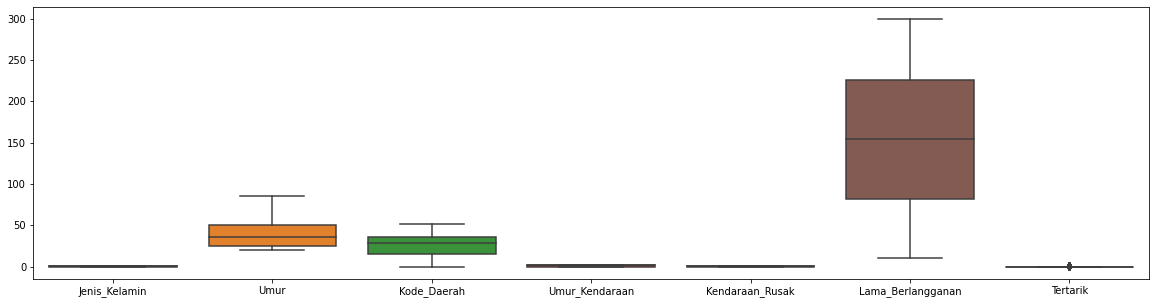

In [ ]:
#Visualisasi data
plt.figure(figsize=(20,5))
sns.boxplot(data= df_data_train)

In [ ]:
#Menampilkan jumlah data beserta dengan outliers
print("jumlah data dengan outliers:", df_data_train.shape)
#Drop outliers
df_data_train = df_data_train[(np.abs(stats.zscore(df_data_train)) < 3).all(axis=1)]
#Menampilkan jumlah data setelah drop outliers
print("jumlah data tanpa outliers:", df_data_train.shape)

jumlah data dengan outliers: (28758, 7)
jumlah data tanpa outliers: (28758, 7)


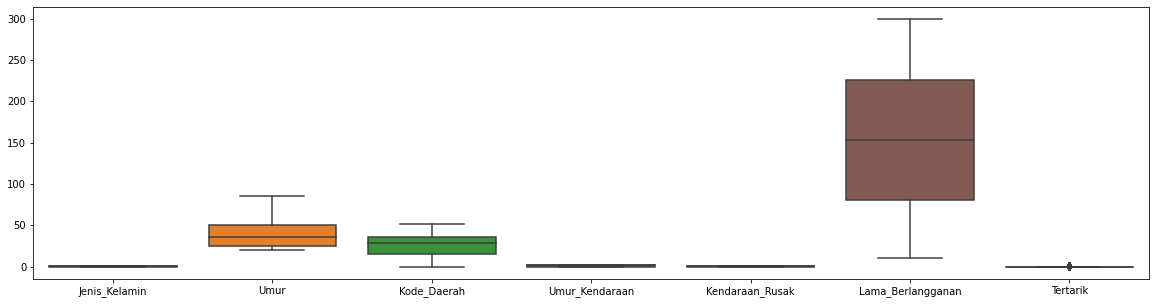

In [ ]:
#Visualisasi data
plt.figure(figsize=(20,5))
sns.boxplot(data= df_data_train)

In [ ]:
#Mengubah nilai data pada tiap kolom menjadi range 0-1
df_data_train_MinMax = (df_data_train - df_data_train.min()) / (df_data_train.max() - df_data_train.min())
#Menyimpan kolom-kolom yang bukan target kedalam variabel x_train
x_train = df_data_train_MinMax.iloc[:, :-1].values
#Menyimpan kolom yang merupakan target ("Tertarik") kedalam variabel y_train
y_train = df_data_train_MinMax.iloc[:, -1].values
#Menampilkan data
x_train

array([[0.        , 0.15384615, 0.63461538, 0.        , 0.        ,
        0.30103806],
       [1.        , 0.43076923, 0.75      , 0.5       , 1.        ,
        0.51211073],
       [0.        , 0.58461538, 0.92307692, 1.        , 0.        ,
        0.183391  ],
       ...,
       [1.        , 0.4       , 0.86538462, 1.        , 1.        ,
        0.31487889],
       [1.        , 0.35384615, 0.96153846, 1.        , 1.        ,
        0.84775087],
       [1.        , 0.43076923, 0.15384615, 1.        , 1.        ,
        0.99653979]])

**PREPROCESSING DATA TEST**

In [ ]:
#Pemanggilan data test
df_data_test = pd.read_csv('/content/kendaraan_test.csv')
#Drop kolom yang tidak digunakan
df_data_test.drop(columns = ['SIM','Sudah_Asuransi','Premi','Kanal_Penjualan'],inplace = True)
#Menampilkan data setelah drop beberapa kolom
df_data_test.head()

,Jenis_Kelamin,Umur,Kode_Daerah,Umur_Kendaraan,Kendaraan_Rusak,Lama_Berlangganan,Tertarik
0,Wanita,49.0,8.0,1-2 Tahun,Pernah,145.0,0.0
1,Pria,22.0,47.0,< 1 Tahun,Tidak,241.0,0.0
2,Pria,24.0,28.0,< 1 Tahun,Tidak,62.0,0.0
3,Pria,46.0,8.0,1-2 Tahun,Tidak,34.0,0.0
4,Pria,35.0,23.0,1-2 Tahun,Pernah,229.0,0.0


In [ ]:
#Drop data yang duplikat
df_data_test = df_data_test.drop_duplicates()
#Drop data yang memiliki nilai null
df_data_test = df_data_test.dropna()
#Menampilkan data setelah drop beberapa data
df_data_test.head()

,Jenis_Kelamin,Umur,Kode_Daerah,Umur_Kendaraan,Kendaraan_Rusak,Lama_Berlangganan,Tertarik
0,Wanita,49.0,8.0,1-2 Tahun,Pernah,145.0,0.0
1,Pria,22.0,47.0,< 1 Tahun,Tidak,241.0,0.0
2,Pria,24.0,28.0,< 1 Tahun,Tidak,62.0,0.0
3,Pria,46.0,8.0,1-2 Tahun,Tidak,34.0,0.0
4,Pria,35.0,23.0,1-2 Tahun,Pernah,229.0,0.0


In [ ]:
#Mengubah value dari kolom "Kendaraan_Rusak" menjadi biner
df_data_test["Kendaraan_Rusak"].replace(["Tidak", "Pernah"], [0,1], inplace = True)
#Mengubah value dari kolom "Jenis_Kelamin" menjadi biner
df_data_test["Jenis_Kelamin"].replace(["Wanita", "Pria"], [0,1], inplace = True)
#Mengubah value dari kolom "Umur_Kendaraan" menjadi biner
df_data_test["Umur_Kendaraan"].replace(["< 1 Tahun", "> 2 Tahun", "1-2 Tahun"], [0,1,2], inplace = True)
#Menampilkan data setelah perubahan
df_data_test.head()

,Jenis_Kelamin,Umur,Kode_Daerah,Umur_Kendaraan,Kendaraan_Rusak,Lama_Berlangganan,Tertarik
0,0,49.0,8.0,2,1,145.0,0.0
1,1,22.0,47.0,0,0,241.0,0.0
2,1,24.0,28.0,0,0,62.0,0.0
3,1,46.0,8.0,2,0,34.0,0.0
4,1,35.0,23.0,2,1,229.0,0.0


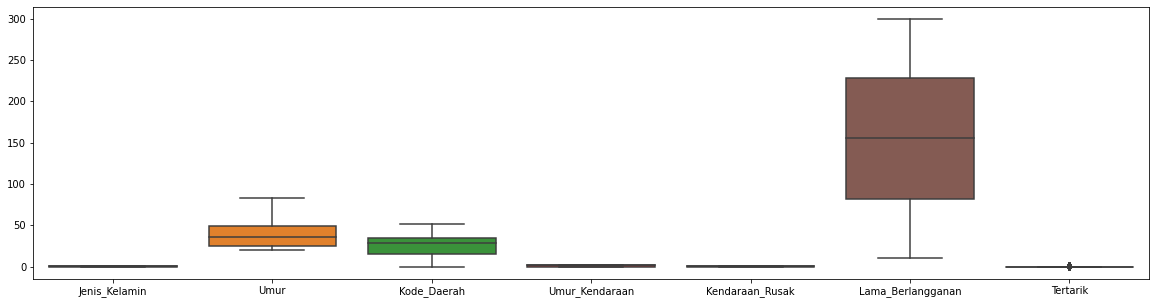

In [ ]:
#Visualisasi data
plt.figure(figsize=(20,5))
sns.boxplot(data= df_data_test)

In [ ]:
#Menampilkan jumlah data beserta dengan outliers
print("jumlah data dengan outliers:", df_data_test.shape)
#Drop outliers
df_data_test = df_data_test[(np.abs(stats.zscore(df_data_test)) < 3).all(axis=1)]
#Menampilkan jumlah data setelah drop outliers
print("jumlah data tanpa outliers:", df_data_test.shape)

jumlah data dengan outliers: (21223, 7)
jumlah data tanpa outliers: (21223, 7)


In [ ]:
#Mengubah nilai data pada tiap kolom menjadi range 0-1
df_data_test_MinMax = (df_data_test - df_data_test.min()) / (df_data_test.max() - df_data_test.min())
#Menyimpan kolom-kolom yang bukan target kedalam variabel x_test
x_test = df_data_test_MinMax.iloc[:, :-1].values
#Menyimpan kolom yang merupakan target ("Tertarik") kedalam variabel y_test
y_test = df_data_test_MinMax.iloc[:, -1].values
#Menampilkan data
x_test

array([[0.        , 0.46031746, 0.15384615, 1.        , 1.        ,
        0.46712803],
       [1.        , 0.03174603, 0.90384615, 0.        , 0.        ,
        0.79930796],
       [1.        , 0.06349206, 0.53846154, 0.        , 0.        ,
        0.1799308 ],
       ...,
       [1.        , 0.06349206, 0.65384615, 0.        , 0.        ,
        0.38408304],
       [1.        , 0.71428571, 0.96153846, 1.        , 1.        ,
        0.91695502],
       [0.        , 0.28571429, 0.67307692, 1.        , 1.        ,
        0.53633218]])

**PEMODELAN**

In [ ]:
#Membuat sebuah objek menggunakan metode decision tree classifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
#Melakukan data train dengan dataset yang ada dengan menggunakan metode fit
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Melakukan klasifikasi pada data test
y_pred = model.predict(x_test)
#Menggabungkan data test dengan hasil prediksi untuk melakukan perbandingan
df_hasil = pd.concat([pd.DataFrame(y_test, columns=['test']) ,pd.DataFrame(y_pred, columns=['predict'])], axis=1)
#Menampilkan data yang sudah digabung
df_hasil.head()

,test,predict
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


**EVALUASI**

Accuracy: 82.70 %
Precision: 28.11 %
Recall: 24.33 %
F1 score: 26.08 %


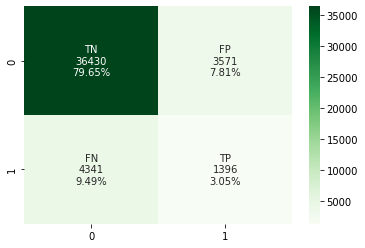

In [ ]:
#Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)
#Menghitung accuracy dengan rumus accuracy = (TP + TN ) / (TP + FP + FN + TN)
accuracy = accuracy_score(y_test, y_pred) * 100
print('Accuracy: %0.2f' % accuracy , '%')
#Menghitung precision dengan rumus precision = (TP) / (TP + FP)
precision = precision_score(y_test, y_pred) * 100
print('Precision: %0.2f' % precision , '%')
#Menghitung recall dengan rumus recall = (TP) / (TP + FN)
recall = recall_score(y_test, y_pred ) *100
print('Recall: %0.2f' % recall , '%')
#Menghitung f1 score dengan rumus f1 score = 2 * (Recall * Precission) / (Recall + Precission)
f1 = f1_score(y_test, y_pred) *100
print('F1 score: %0.2f' % f1 , '%')

#Visualisasi confusion matrix
group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')

**EKSPERIMEN NAIVE BAYES**

In [ ]:
#Menyimpan kolom-kolom yang bukan target kedalam variabel x_train
eks1_x_train = df_data_train_MinMax.iloc[:, :-1].values
#Menyimpan kolom yang merupakan target ("Tertarik") kedalam variabel y_train
eks1_y_train = df_data_train_MinMax.iloc[:, -1].values
#Menyimpan kolom-kolom yang bukan target kedalam variabel x_test
eks1_x_test = df_data_test_MinMax.iloc[:, :-1].values
#Menyimpan kolom yang merupakan target ("Tertarik") kedalam variabel y_test
eks1_y_test = df_data_test_MinMax.iloc[:, -1].values

In [ ]:
#Membuat sebuah objek menggunakan metode Naive Bayes
eks1_model = GaussianNB()
#Melakukan data train dengan dataset yang ada dengan menggunakan metode fit
eks1_model.fit(eks1_x_train, eks1_y_train)

GaussianNB()

In [ ]:
#Melakukan klasifikasi pada data test
eks1_y_pred = eks1_model.predict(eks1_x_test)
#Menggabungkan data test dengan hasil prediksi untuk melakukan perbandingan
eks1_df_hasil = pd.concat([pd.DataFrame(eks1_y_test, columns=['test']) ,pd.DataFrame(eks1_y_pred, columns=['predict'])], axis=1)
#Menampilkan data yang sudah digabung
eks1_df_hasil.head()

,test,predict
0,0.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0


Accuracy: 72.07 %
Precision: 28.13 %
Recall: 78.86 %
F1 score: 41.46 %


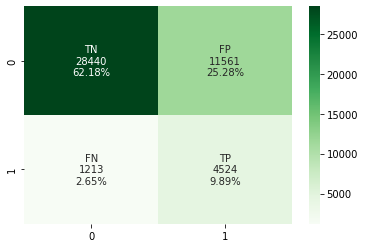

In [ ]:
#Membuat confusion matrix
eks1_cm = confusion_matrix(eks1_y_test, eks1_y_pred)

#Menghitung accuracy dengan rumus accuracy = (TP + TN ) / (TP + FP + FN + TN)
accuracy = accuracy_score(eks1_y_test, eks1_y_pred) * 100
print('Accuracy: %0.2f' % accuracy , '%')
#Menghitung precision dengan rumus precision = (TP) / (TP + FP)
precision = precision_score(eks1_y_test, eks1_y_pred) * 100
print('Precision: %0.2f' % precision , '%')
#Menghitung recall dengan rumus recall = (TP) / (TP + FN)
recall = recall_score(eks1_y_test, eks1_y_pred ) *100
print('Recall: %0.2f' % recall , '%')
#Menghitung f1 score dengan rumus f1 score = 2 * (Recall * Precission) / (Recall + Precission)
f1 = f1_score(eks1_y_test, eks1_y_pred) *100
print('F1 score: %0.2f' % f1 , '%')

#Visualisasi confusion matrix
group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ["{0:0.0f}".format(value) for value in eks1_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in eks1_cm.flatten()/np.sum(eks1_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(eks1_cm, annot=labels, fmt='', cmap='Greens')

**EKSPERIMEN LOGISTIC REGRESSION**

In [ ]:
#Menyimpan kolom-kolom yang bukan target kedalam variabel x_train
eks2_x_train = df_data_train_MinMax.iloc[:, :-1].values
#Menyimpan kolom yang merupakan target ("Tertarik") kedalam variabel y_train
eks2_y_train = df_data_train_MinMax.iloc[:, -1].values
#Menyimpan kolom-kolom yang bukan target kedalam variabel x_test
eks2_x_test = df_data_test_MinMax.iloc[:, :-1].values
#Menyimpan kolom yang merupakan target ("Tertarik") kedalam variabel y_test
eks2_y_test = df_data_test_MinMax.iloc[:, -1].values

In [ ]:
#Membuat sebuah objek menggunakan metode Logistic Regression
eks2_model = LogisticRegression(random_state = 0)
#Melakukan data train dengan dataset yang ada dengan menggunakan metode fit
eks2_model.fit(eks2_x_train, eks2_y_train)

LogisticRegression(random_state=0)

In [ ]:
#Melakukan klasifikasi pada data test
eks2_y_pred = eks2_model.predict(eks2_x_test)
#Menggabungkan data test dengan hasil prediksi untuk melakukan perbandingan
eks2_df_hasil = pd.concat([pd.DataFrame(eks2_y_test, columns=['test']) ,pd.DataFrame(eks2_y_pred, columns=['predict'])], axis=1)
#Menampilkan data yang sudah digabung
eks2_df_hasil.head()

,test,predict
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


Accuracy: 87.46 %
Precision: 0.00 %
Recall: 0.00 %
F1 score: 0.00 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


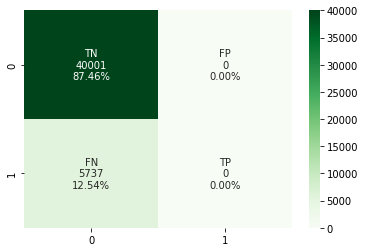

In [ ]:
#Membuat confusion matrix
eks2_cm = confusion_matrix(eks2_y_test, eks2_y_pred)

#Menghitung accuracy dengan rumus accuracy = (TP + TN ) / (TP + FP + FN + TN)
accuracy = accuracy_score(eks2_y_test, eks2_y_pred) * 100
print('Accuracy: %0.2f' % accuracy , '%')
#Menghitung precision dengan rumus precision = (TP) / (TP + FP)
precision = precision_score(eks2_y_test, eks2_y_pred) * 100
print('Precision: %0.2f' % precision , '%')
#Menghitung recall dengan rumus recall = (TP) / (TP + FN)
recall = recall_score(eks2_y_test, eks2_y_pred ) *100
print('Recall: %0.2f' % recall , '%')
#Menghitung f1 score dengan rumus f1 score = 2 * (Recall * Precission) / (Recall + Precission)
f1 = f1_score(eks2_y_test, eks2_y_pred) *100
print('F1 score: %0.2f' % f1 , '%')

#Visualisasi confusion matrix
group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ["{0:0.0f}".format(value) for value in eks2_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in eks2_cm.flatten()/np.sum(eks2_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(eks2_cm, annot=labels, fmt='', cmap='Greens')